# Optical Communications Project -- Team 8

In [1]:
# fibre specification
n1 = 1.46
n2 = 1.45
lambda_ = 820e-9
a = 5.1e-6
c = 3e8

In [2]:
#import relevant packages
import numpy as np
import math as m
import matplotlib.pyplot as plt
import scipy as sp
import scipy.special as ss
from scipy.optimize import fsolve

## 1. Calculate the V-parameter for the fibre.

In [3]:
V = 2*np.pi*a/lambda_*np.sqrt(n1*n1-n2*n2)
print(V)

6.666266729164944


## 2. Decide whether you are going to consider the {TE, TM, EH, HE} or LP modes for all of the subsequent tasks.


## 3. Identify all the modes that the fibre supports and the propagation constant and effective index for each mode. Summarise the results as a table.

/var/folders/pr/jp7pz9r16yz0cf99zzh58mtm0000gn/T/ipykernel_10452/2102072111.py:17: RuntimeWarning: invalid value encountered in double_scalars
  u=-ss.kn(m+1, qa)+m*ss.kn(m, qa)/qa
/var/folders/pr/jp7pz9r16yz0cf99zzh58mtm0000gn/T/ipykernel_10452/2102072111.py:18: RuntimeWarning: invalid value encountered in double_scalars
  l= qa*ss.kn(m, qa)
/var/folders/pr/jp7pz9r16yz0cf99zzh58mtm0000gn/T/ipykernel_10452/2102072111.py:41: RuntimeWarning: divide by zero encountered in double_scalars
  t1=(1/(pa)**2+1/(qa)**2)
/var/folders/pr/jp7pz9r16yz0cf99zzh58mtm0000gn/T/ipykernel_10452/2102072111.py:42: RuntimeWarning: divide by zero encountered in double_scalars
  t2=(1/(pa)**2+n2**2/(n1*qa)**2)
/var/folders/pr/jp7pz9r16yz0cf99zzh58mtm0000gn/T/ipykernel_10452/2102072111.py:43: RuntimeWarning: invalid value encountered in double_scalars
  return m**2*t1*t2
/var/folders/pr/jp7pz9r16yz0cf99zzh58mtm0000gn/T/ipykernel_10452/2102072111.py:12: RuntimeWarning: invalid value encountered in double_scalars


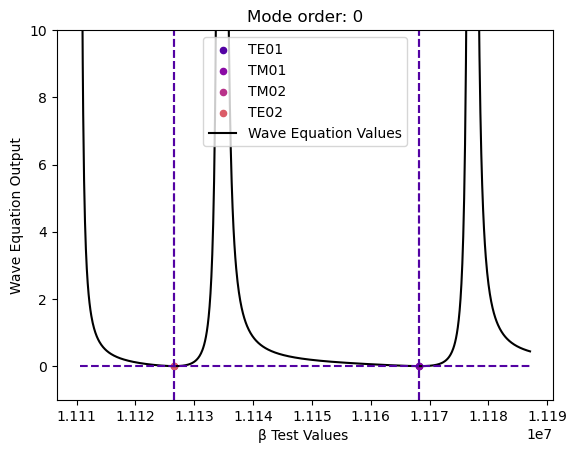

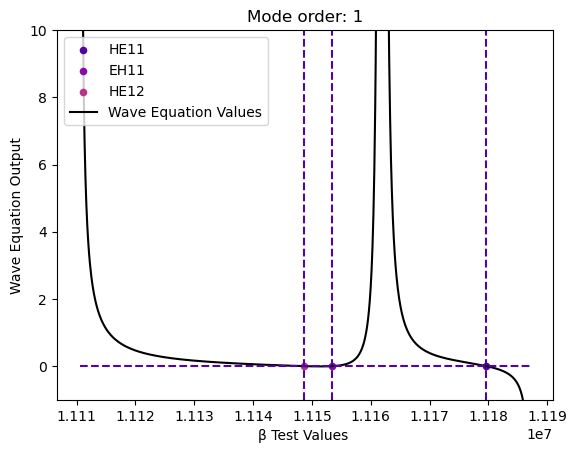

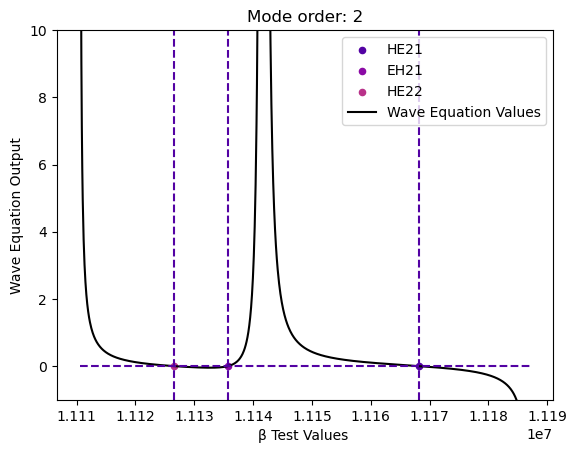

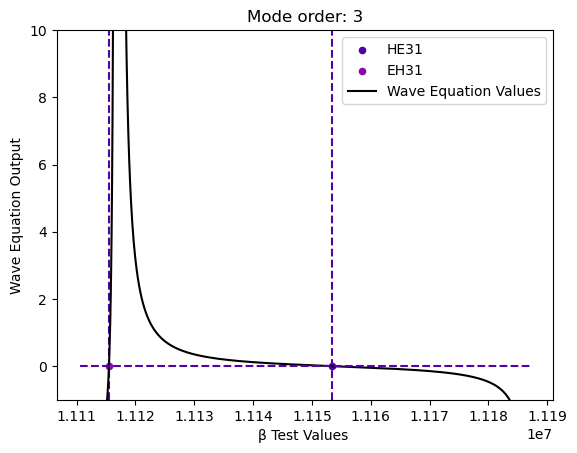

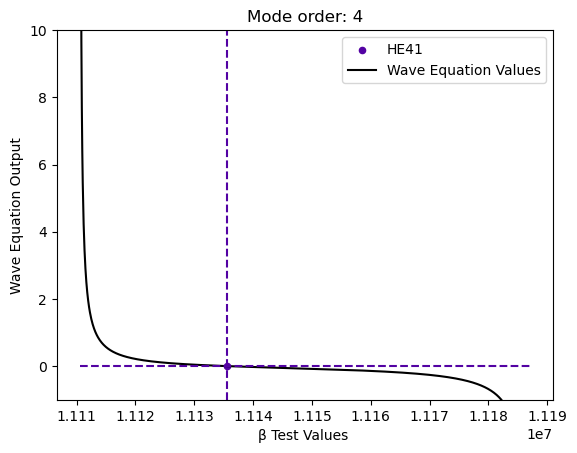

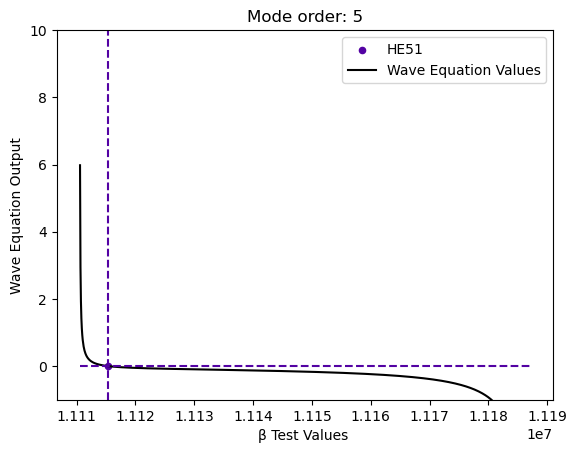

/var/folders/pr/jp7pz9r16yz0cf99zzh58mtm0000gn/T/ipykernel_10452/2102072111.py:31: RuntimeWarning: invalid value encountered in sqrt
  pa=np.sqrt((n1*k0)**2-b**2)*a
/var/folders/pr/jp7pz9r16yz0cf99zzh58mtm0000gn/T/ipykernel_10452/2102072111.py:39: RuntimeWarning: invalid value encountered in sqrt
  pa=np.sqrt((n1*k0)**2-b**2)*a


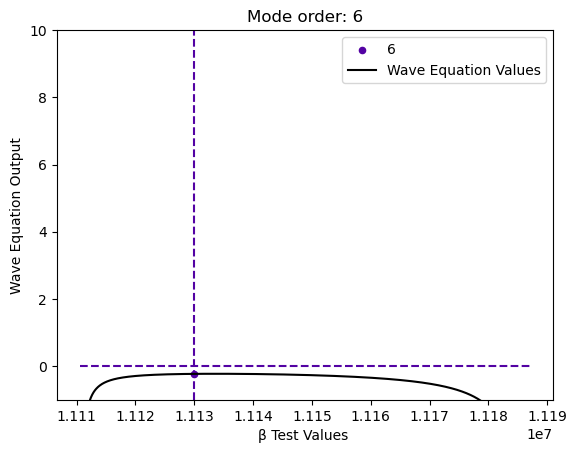

[['TE01', 0, 11168259.1, 1.4575365860267546, 3.3129360121055274], ['TM01', 0, 11168205.8, 1.457529630000812, 3.317606184992294], ['TM02', 0, 11126620.6, 1.4521024680864505, 5.9263215683836235], ['TE02', 0, 11126545.2, 1.452092627854629, 5.930002463491131], ['HE11', 1, 11179639.6, 1.4590218215472377, 2.088160656571897], ['EH11', 1, 11153460.3, 1.4556052382458555, 4.423522301785097], ['HE12', 1, 11148568.2, 1.4549667846902334, 4.733427741729404], ['HE21', 2, 11168222.5, 1.4575318094686027, 3.3161436324966624], ['EH21', 2, 11135718.2, 1.4532897690548743, 5.463824832771996], ['HE22', 2, 11126554.2, 1.452093802418109, 5.929563220758515], ['HE31', 3, 11153425.0, 1.4556006313468728, 4.425836721801819], ['EH31', 3, 11115505.7, 1.4506518952393332, 6.446041713477675], ['HE41', 4, 11135639.7, 1.4532795242511873, 5.467984558107816], ['HE51', 5, 11115366.5, 1.450633728657509, 6.452281975389328], ['6', 6, 11130000.0, 1.452543503622492, 5.7589035915359545]]
| Mode name | Mode | beta |neffective |
| T

In [4]:
# global m1 #Such that the mode being investigated can be fixed universally 
#Defining useful vars 
RNA = 1.1428
RNB = 0.996
k0=2*np.pi/lambda_
#Color scheme
import seaborn
seaborn.set_palette("plasma")


def j(pa, m):
    u=-ss.jv(m+1, pa)+m*ss.jv(m, pa)/pa
    l=pa*ss.jv(m, pa)
    return u/l

def k(qa, m):
    u=-ss.kn(m+1, qa)+m*ss.kn(m, qa)/qa 
    l= qa*ss.kn(m, qa)
    return u/l

def b(pa):
    p=pa/a
    b=np.sqrt((n1*k0)**2-p**2)
    return b
    
def pa(b):
    p=np.sqrt((n1*k0)**2-b**2)
    return p*a

def lhs(b, m):
    pa=np.sqrt((n1*k0)**2-b**2)*a
    qa=np.sqrt(b**2-(n2*k0)**2)*a
    t1=(j(pa, m)+k(qa, m))
    t2=(j(pa, m)+n2**2*k(qa, m)/n1**2)

    return t1*t2

def rhs(b, m):
    pa=np.sqrt((n1*k0)**2-b**2)*a
    qa=np.sqrt(b**2-(n2*k0)**2)*a
    t1=(1/(pa)**2+1/(qa)**2)
    t2=(1/(pa)**2+n2**2/(n1*qa)**2)
    return m**2*t1*t2 

def f(b):
   return lhs(b, m1)-rhs(b, m1)

LHS=[]
RHS=[]
btest=np.linspace(n2*k0,n1*k0, 1000)
mi=[0, 1, 2, 3, 4, 5, 6] #Modes being investigated
m0=[['TE01', 'TM01', 'TM02', 'TE02'], ['HE11', 'EH11', 'HE12'], ['HE21', 'EH21', 'HE22'], ['HE31', 'EH31'], ['HE41'], ["HE51"], ["6"]]
#Guesses based on plotted graphs from 
guesses=[[1.112, 1.113, 1.116, 1.1172], [1.114, 1.1152, 1.117, 1.1181], [1.112, 1.1132, 1.116, 1.118, 1.114, 1.1135], [1.1115, 1.115], [1.113], [(min(btest)+1)/(1e7)],  [1.113]]
solfull=[] #Full solutions
for m in mi:
    LHS=[]
    RHS=[]
    paVals=[]
    fi=[]
    m1=m
    solutions=[]
    for b in btest: # probes wave equation at different beta values
          fi.append(f(b))
    solutions=[]
    for br in guesses[m]: # finds solutions for which wave equation =0, i.e. finds function roots
       sol=sp.optimize.root(f, br*1e7) # Find roots of LHS-RHS function, using initial guesses based on graphs   
       solutions.append(round(sol.x[0], 1)) #Append root solution
    s1=np.array(solutions) #Make array
    s1=np.flip(np.unique(s1)) #Remove repeats and reorder array
    i=0
    for s in s1:
           plt.scatter(s,f(s), label=m0[m][i], s=20, cmap='plasma' ) #Plot root  found
           plt.vlines(s,-1,10, linestyle='--' ) #plot vertical line at intersection
           paVals.append(pa(s))
           solfull.append([m0[m][i],m, s,s/k0, pa(s)]) #Append full solutions to solution list
           i+=1

    plt.plot(btest, fi, 'k', label="Wave Equation Values") #plot function behaviour
    plt.hlines(0, btest[0],btest[-1], linestyle='--' ) #Put horizontal line to show 0 point
    plt.xlabel("\u03B2 Test Values ")
    plt.ylabel("Wave Equation Output")
    plt.ylim(-1, 10)
    plt.legend()
    plt.title("Mode order: "+str(m))
    #plt.savefig("Desktop/out/mode"+str(m)+".png")
    plt.show()


print(solfull )
print('| {:1} | {:^4} | {:>4} |{:<3} |'.format(*["Mode name","Mode", "beta", "neffective"]))


for row in solfull:
    print('| {:1} | {:^4} | {:>4} | {:<3} |'.format(*row))
    print('----------------------------------------------')
 
print(solfull[5])

b=solfull[5][2]
n=solfull[5][3]
 

 

## 4. Excluding the fundamental mode {HE11/LP01}, pick one of the modes from your table for the tasks below.


## 5. Plot maps in the plane perpendicular to the fibre axis of the amplitude of all three E-fields within the fibre. You will need to fix one of the A or B parameters, e.g. to unity, and use the relevant equations to calculate the other values. You can choose to do this for either the {radial, tangential, z} or {x, y, z} E-field components.


1
0.003938121727345105j
-51.102732188877475
(-0-0.2012487799597165j)


/var/folders/pr/jp7pz9r16yz0cf99zzh58mtm0000gn/T/ipykernel_10452/3149640845.py:150: ComplexWarning: Casting complex values to real discards the imaginary part
  Er_vals[i,l]=Er_clad[i,l]
/var/folders/pr/jp7pz9r16yz0cf99zzh58mtm0000gn/T/ipykernel_10452/3149640845.py:152: ComplexWarning: Casting complex values to real discards the imaginary part
  Ephi_vals[i,l]=Ephi_clad[i,l]
/var/folders/pr/jp7pz9r16yz0cf99zzh58mtm0000gn/T/ipykernel_10452/3149640845.py:143: ComplexWarning: Casting complex values to real discards the imaginary part
  Er_vals[i,l]=Er_core[i,l]
/var/folders/pr/jp7pz9r16yz0cf99zzh58mtm0000gn/T/ipykernel_10452/3149640845.py:145: ComplexWarning: Casting complex values to real discards the imaginary part
  Ephi_vals[i,l]=Ephi_core[i,l]


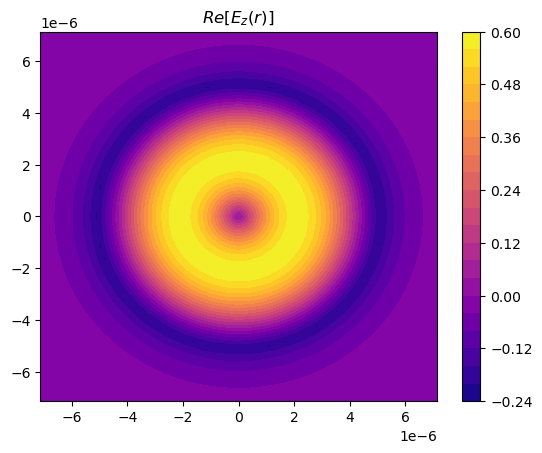

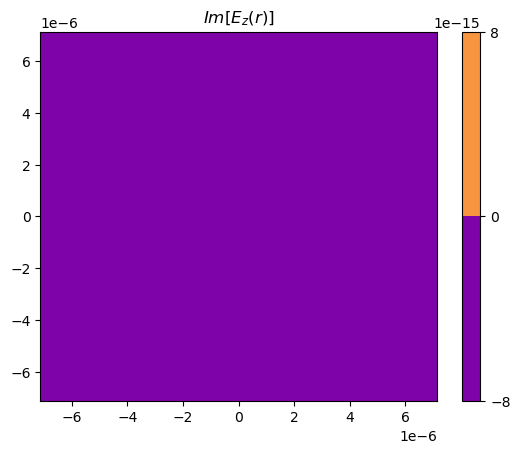

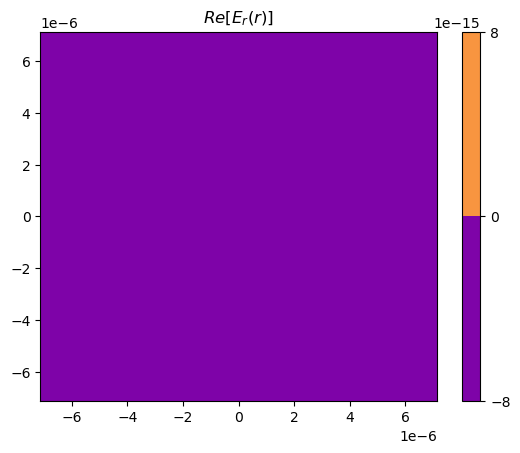

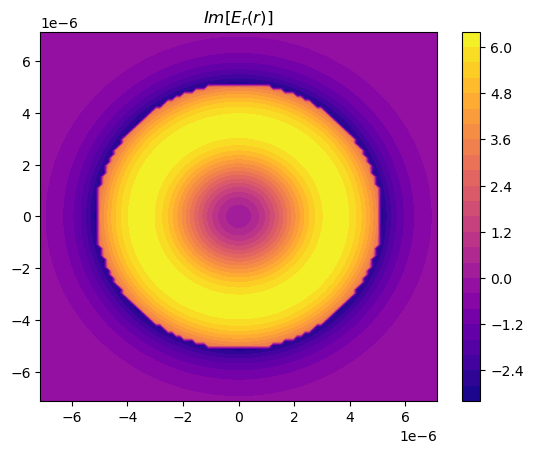

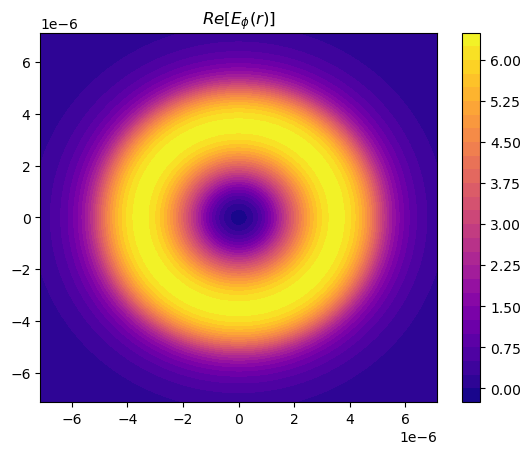

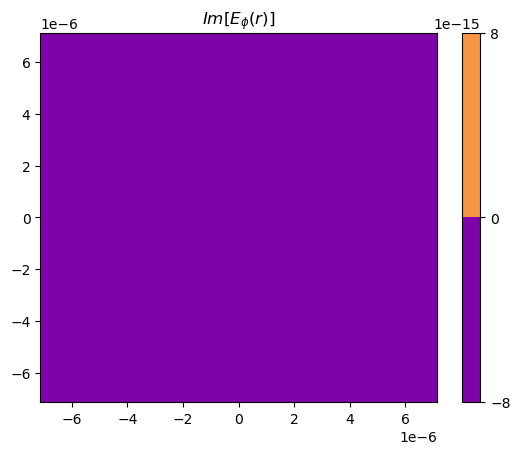

In [5]:
global k0
global w
global mu0
mu0=4*np.pi*1e-7 #vacuum permeability constant in H/m
w=c*k0 #angular frequency of the light

#Choosing the EH11 Mode
global eh11_beta 
#eh11_beta=11148568.2
eh11_beta=11153460.3
eh11_pa=np.sqrt((n1*k0)**2-eh11_beta**2)*a
eh11_qa=np.sqrt(eh11_beta**2-(n2*k0)**2)*a

#fix A to unity to find amplitudes B,C,D
A=1
#B=1

def B(b, m): #finding amplitude B from setting A=1
    pa=np.sqrt((n1*k0)**2-b**2)*a
    qa=np.sqrt(b**2-(n2*k0)**2)*a
    t1=1j*b*m*((1/pa**2)+(1/qa**2))/(w*mu0)
    t2=(j(pa, m)+k(qa, m))
    return t1/t2
# def A(b, m): #finding amplitude A from setting B=1
#     pa=np.sqrt((n1*k0)**2-b**2)*a
#     qa=np.sqrt(b**2-(n2*k0)**2)*a
#     t1=1j*b*m*((1/pa**2)+(1/qa**2))/(w*mu0)
#     t2=(j(pa, m)+k(qa, m))
#     return t2/t1

# A=A(eh11_beta,1)
B=B(eh11_beta,1)
C=A*(ss.jv(1, eh11_pa))/(ss.kn(1, eh11_qa))


D=B*(ss.jv(1, eh11_pa))/(ss.kn(1, eh11_qa))

print(A)
print (B)
print (C)
print (D)
#plotting the three E-field components within the fibre core (1D graphs)

#creating a 2D grid (>width of the fibre radius) for a contour plot
x=np.linspace(-1.4*a,1.4*a,100)
y=np.linspace(-1.4*a,1.4*a,100)
X,Y=np.meshgrid(x,y)
R=np.sqrt(X**2 + Y**2) #position R on 2D plot

# Z COMPONENT
def Ez(r): # z field in the core
    m=1
    p=np.sqrt((n1*k0)**2-eh11_beta**2)
    return A*(ss.jv(m,p*r))
Ez_cor=[]
for i in R:
    Ez_cor.append(Ez(i)) #field due to core for all r
Ez_core=(np.array(Ez_cor)) #array of the real component
Ez_corei=np.imag(np.array(Ez_cor)) #array of the imaginary component

def Ezc(r): # z field in the cladding region 
    m=1
    q=np.sqrt(eh11_beta**2-(k0*n2)**2)
    return C*(ss.kn(m, q*r))
Ez_cla=[]
for i in R:
    Ez_cla.append(Ezc(i)) #field due to cladding for all r
Ez_clad=(np.array(Ez_cla))
Ez_cladi=np.imag(np.array(Ez_cla))

# R COMPONENT
def Er(r): #r field in core
    m=1
    p=np.sqrt((n1*k0)**2-eh11_beta**2)
    factor=(-1j*eh11_beta/p**2)
    u=-ss.jv(m+1, p*r)+m*ss.jv(m, p*r)/(p*r) #J'
    l=ss.jv(m, p*r) #J
    t1=A*p*u
    t2=(1j*w*mu0*(B)*m*l)/(eh11_beta*r)
    return factor*(t1+t2)
Er_cor=[]
for i in R:
    Er_cor.append(Er(i)) #field due to core for all r
Er_core=(np.array(Er_cor))
Er_corei=np.imag(np.array(Er_cor))

def Erc(r): # r field in cladding
    m=1
    q=np.sqrt(eh11_beta**2-(k0*n2)**2)
    factor=(-1j*eh11_beta/q**2)
    u=-ss.kn(m+1, q*r)+m*ss.kn(m, q*r)/(q*r) 
    t1=C*q*u
    t2=1j*w*mu0*m*D*ss.kn(m, q*r)/(eh11_beta*r)
    return factor*(t1+t2)
Er_cla=[]
for i in R:
    Er_cla.append(Erc(i)) #field due to cladding for all r
Er_clad=(np.array(Er_cla))
Er_cladi=np.imag(np.array(Er_cla))

# PHI COMPONENT
def Ephi(r): # e-phi field in core
    m=1
    p=np.sqrt((n1*k0)**2-eh11_beta**2)
    factor=(-1j*eh11_beta/p**2)
    u=-ss.jv(m+1, p*r)+m*ss.jv(m, p*r)/(p*r) #J'
    l=ss.jv(m, p*r) #J
    t1=1j*m*A*l/r
    t2=-w*mu0*p*B*u/eh11_beta
    return factor*(t1+t2)
Ephi_cor=[]
for i in R:
    Ephi_cor.append(Ephi(i)) #field due to core for all r
Ephi_core=np.array(Ephi_cor)
Ephi_corei=np.imag(np.array(Ephi_cor))

def Ephic(r): #e-phi field in cladding region
    m=1
    q=np.sqrt(eh11_beta**2-(k0*n2)**2)
    factor=(1j*eh11_beta/q**2)
    u=-ss.kn(m+1, q*r)+m*ss.kn(m, q*r)/(q*r) 
    t1=1j*m*C*ss.kn(m, q*r)/r
    t2=-w*mu0*q*D*u/eh11_beta
    return factor*(t1+t2)
Ephi_cla=[]
for i in R:
    Ephi_cla.append(Ephic(i)) #field due to clad for all r
Ephi_clad=np.array(Ephi_cla)
Ephi_cladi=np.imag(np.array(Ephi_cla))


Ez_vals=np.ones(Ez_core.shape) #shape is same for cladding and core
Ezi_vals=np.ones(Ez_core.shape)
Er_vals=np.ones(Er_core.shape)
Eri_vals=np.ones(Er_core.shape)
Ephi_vals=np.ones(Ephi_core.shape)
Ephii_vals=np.ones(Ephi_core.shape)
for i in range(0,len(x)):
    for l in range(0,len(y)):
        if np.sqrt(x[i]**2+y[l]**2)<=a: #restrict to core field within core
            Ez_vals[i,l]=Ez_core[i,l]
            Ezi_vals[i,l]=Ez_corei[i,l]
            Er_vals[i,l]=Er_core[i,l]
            Eri_vals[i,l]=Er_corei[i,l]
            Ephi_vals[i,l]=Ephi_core[i,l]
            Ephii_vals[i,l]=Ephi_corei[i,l]
        else:
            Ez_vals[i,l]=Ez_clad[i,l]
            Ezi_vals[i,l]=Ez_cladi[i,l]
            Er_vals[i,l]=Er_clad[i,l]
            Eri_vals[i,l]=Er_cladi[i,l]
            Ephi_vals[i,l]=Ephi_clad[i,l]
            Ephii_vals[i,l]=Ephi_cladi[i,l]

#plotting both the real and imaginary part of each component 
plt.contourf(X,Y,Ez_vals,25,cmap='plasma')
plt.colorbar()
plt.title('$Re[E_z(r)]$')
plt.show()
plt.contourf(X,Y,Ezi_vals,25,cmap='plasma')
plt.colorbar()
plt.title('$Im[E_z(r)]$')
plt.show()
plt.contourf(X,Y,Er_vals,25,cmap='plasma')
plt.colorbar()
plt.title('$Re[E_r(r)]$')
plt.show()
plt.contourf(X,Y,Eri_vals,25,cmap='plasma')
plt.colorbar()
plt.title('$Im[E_r(r)]$')
plt.show()
plt.contourf(X,Y,Ephi_vals,25,cmap='plasma')
plt.colorbar()
plt.title('$Re[E_\phi(r)]$')
plt.show()
plt.contourf(X,Y,Ephii_vals,25,cmap='plasma')
plt.colorbar()
plt.title('$Im[E_\phi(r)]$')
plt.show()

## 6. Plot the spatial distribution of the total intensity of the mode in the direction perpendicular to the fibre axis, e.g. sum of the square modulus of the field in the {radial, tangential} or {x, y} directions.

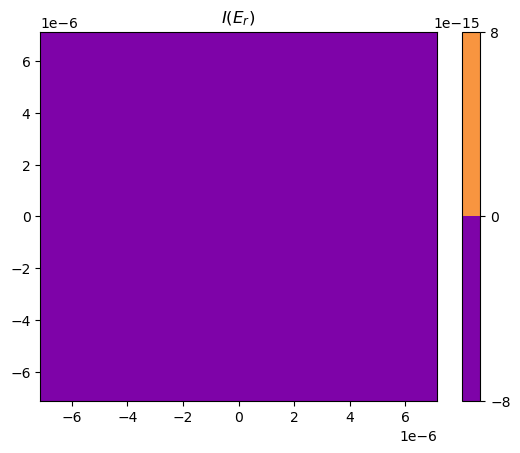

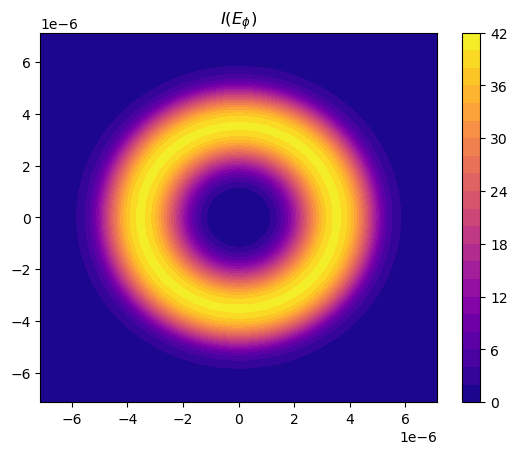

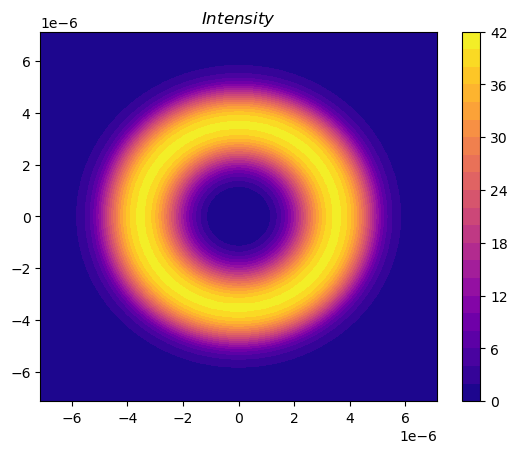

In [6]:
# Intensity in radial direction
Er_intensity = []
Er_vals_Real = []   # the real part of E-field in radial direction - absolute value instead???

for i in range(len(Er_vals)):
    Er_vals_Real.append(Er_vals[i].real)
    
for i in range(len(Er_vals)):
    Er_intensity.append(Er_vals_Real[i]**2)

# Plot for radial direction
plt.contourf(X,Y,Er_intensity,25,cmap='plasma')
plt.colorbar()
plt.title('$I(E_r)$')
plt.show()

# Intensity in tangential direction
Ephi_intensity = []
Ephi_vals_Real = []   # the real part of E-field in tangential direction

for i in range(len(Ephi_vals)):
    Ephi_vals_Real.append(Ephi_vals[i].real)

for i in range(len(Ephi_vals)):
    Ephi_intensity.append(Ephi_vals_Real[i]**2)

# Plot for tangential direction
plt.contourf(X,Y,Ephi_intensity,25,cmap='plasma')
plt.colorbar()
plt.title('$I(E_\phi)$')
plt.show()

# Plot for total intensity
I = np.array(Ephi_intensity) + np.array(Er_intensity)
plt.contourf(X,Y,I,25,cmap='plasma')
plt.colorbar()
plt.title('$Intensity$')
plt.show()

## 7. Calculate numerically the waveguide dispersion $ 𝐷_w = − \frac{\lambda}{c} [\frac{\partial^2n_{eff}}{\partial\lambda^2}]_w = − \frac{\lambda}{c} [\frac{\partial^2n_{m}}{\partial\lambda^2}]_w $ for the mode selected, see notes for lecture 6. For example, calculate this from the effective index calculated for three (or more) wavelengths close to the wavelength of light to be transmitted.

/var/folders/pr/jp7pz9r16yz0cf99zzh58mtm0000gn/T/ipykernel_10452/2102072111.py:17: RuntimeWarning: invalid value encountered in double_scalars
  u=-ss.kn(m+1, qa)+m*ss.kn(m, qa)/qa
/var/folders/pr/jp7pz9r16yz0cf99zzh58mtm0000gn/T/ipykernel_10452/2102072111.py:18: RuntimeWarning: invalid value encountered in double_scalars
  l= qa*ss.kn(m, qa)
/var/folders/pr/jp7pz9r16yz0cf99zzh58mtm0000gn/T/ipykernel_10452/2102072111.py:41: RuntimeWarning: divide by zero encountered in double_scalars
  t1=(1/(pa)**2+1/(qa)**2)
/var/folders/pr/jp7pz9r16yz0cf99zzh58mtm0000gn/T/ipykernel_10452/2102072111.py:42: RuntimeWarning: divide by zero encountered in double_scalars
  t2=(1/(pa)**2+n2**2/(n1*qa)**2)
/var/folders/pr/jp7pz9r16yz0cf99zzh58mtm0000gn/T/ipykernel_10452/2102072111.py:43: RuntimeWarning: invalid value encountered in double_scalars
  return m**2*t1*t2
/var/folders/pr/jp7pz9r16yz0cf99zzh58mtm0000gn/T/ipykernel_10452/2102072111.py:12: RuntimeWarning: invalid value encountered in double_scalars


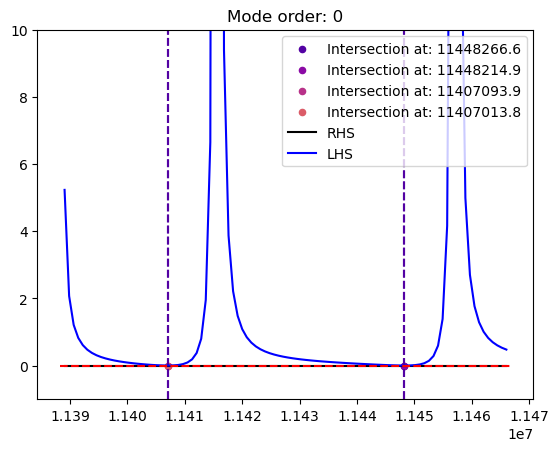

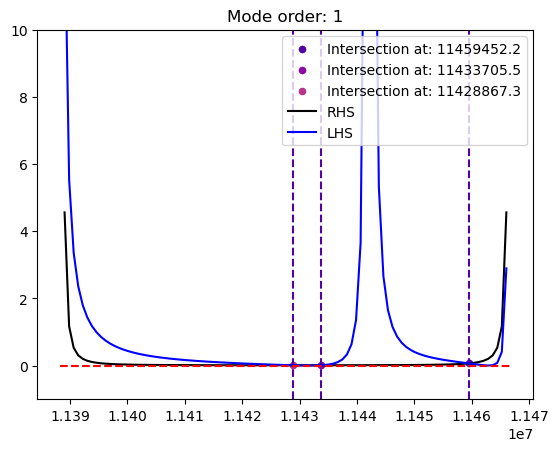

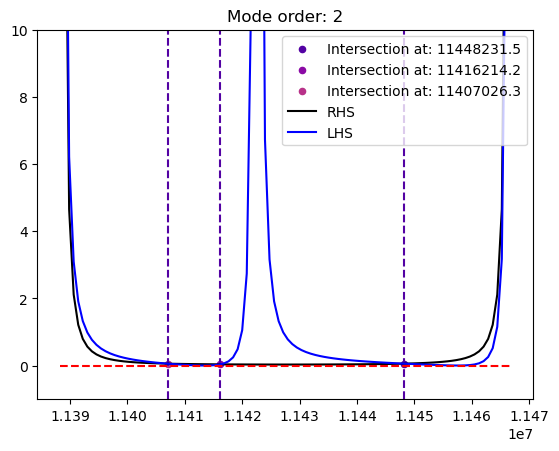

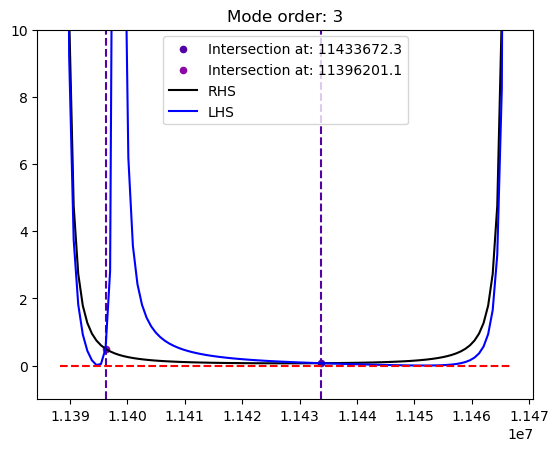

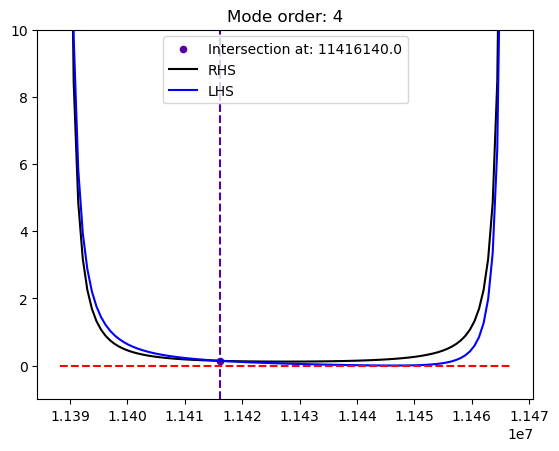

In [7]:
# this cell tests the initial guesses of 800nm wavelength
k0 = 2*np.pi/800e-9
LHS=[]
RHS=[]
btest=np.linspace(n2*k0,n1*k0, 100)
mi=[0, 1, 2, 3, 4] #Modes being investigated
m0=[['TE01', 'TM01', 'TM02', 'TE02'], ['HE11', 'EH11', 'HE12'], ['HE21', 'EH21', 'HE22'], ['HE31', 'EH31'], ['HE41']]
#Guesses based on plotted graphs from 
guesses=[[1.14, 1.141, 1.144, 1.145], [1.143, 1.144, 1.146], [1.139, 1.144,1.141,1.142], [1.1395, 1.143], [1.14], [min(btest)]]
solfull=[] #Full solutions
for m in mi:
    LHS=[]
    RHS=[]
    paVals=[]
    m1=m
    solutions=[]
    for b in btest:
          LHS.append(lhs(b, m))
          RHS.append(rhs(b, m))
    solutions=[]
    for br in guesses[m]:
       sol=sp.optimize.root(f, br*1e7) # Find roots of LHS-RHS function, using initial guesses based on visual queues from graph   
       solutions.append(round(sol.x[0], 1)) #Append root solution
    s1=np.array(solutions)
    s1=np.flip(np.unique(s1))
    i=0
    for s in s1:
           plt.scatter(s,lhs(s, m), label="Intersection at: "+str(round(s, 1)), s=20 ) #Plot intersection point
           plt.vlines(s,-1,10, linestyle='--' ) #plot vertical line at intersection
           paVals.append(pa(s))
           solfull.append([m0[m][i],m, s,s/k0, pa(s)])
           i+=1
    plt.plot(btest, RHS, 'k', label="RHS")
    plt.plot(btest, LHS, 'b', label="LHS")
    plt.hlines(0, btest[0],btest[-1], linestyle='--', colors='r' )
    plt.ylim(-1, 10)
    plt.legend()
    plt.title("Mode order: "+str(m))
    plt.show()

/var/folders/pr/jp7pz9r16yz0cf99zzh58mtm0000gn/T/ipykernel_10452/2102072111.py:17: RuntimeWarning: invalid value encountered in double_scalars
  u=-ss.kn(m+1, qa)+m*ss.kn(m, qa)/qa
/var/folders/pr/jp7pz9r16yz0cf99zzh58mtm0000gn/T/ipykernel_10452/2102072111.py:18: RuntimeWarning: invalid value encountered in double_scalars
  l= qa*ss.kn(m, qa)
/var/folders/pr/jp7pz9r16yz0cf99zzh58mtm0000gn/T/ipykernel_10452/2102072111.py:41: RuntimeWarning: divide by zero encountered in double_scalars
  t1=(1/(pa)**2+1/(qa)**2)
/var/folders/pr/jp7pz9r16yz0cf99zzh58mtm0000gn/T/ipykernel_10452/2102072111.py:42: RuntimeWarning: divide by zero encountered in double_scalars
  t2=(1/(pa)**2+n2**2/(n1*qa)**2)
/var/folders/pr/jp7pz9r16yz0cf99zzh58mtm0000gn/T/ipykernel_10452/2102072111.py:43: RuntimeWarning: invalid value encountered in double_scalars
  return m**2*t1*t2
/var/folders/pr/jp7pz9r16yz0cf99zzh58mtm0000gn/T/ipykernel_10452/2102072111.py:12: RuntimeWarning: invalid value encountered in double_scalars


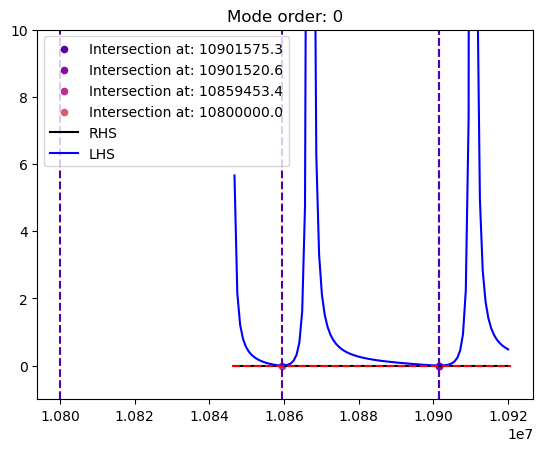

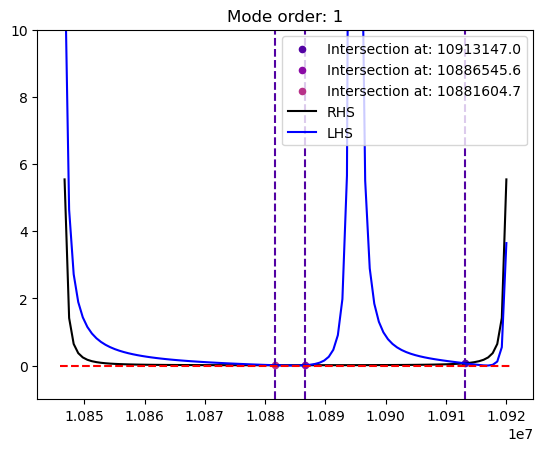

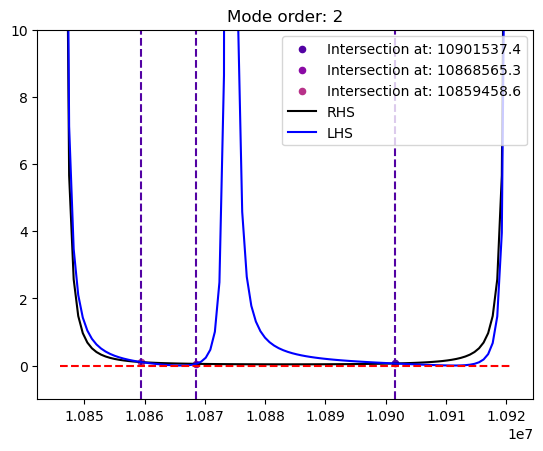

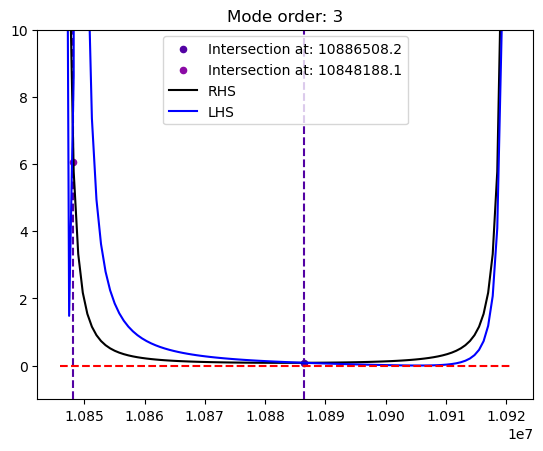

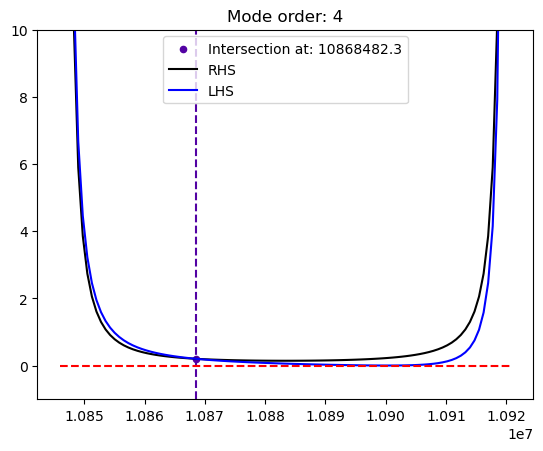

In [8]:
# this cell tests the initial guesses of 840nm wavelength
k0 = 2*np.pi/840e-9
LHS=[]
RHS=[]
btest=np.linspace(n2*k0,n1*k0, 100)
mi=[0, 1, 2, 3, 4] #Modes being investigated
m0=[['TE01', 'TM01', 'TM02', 'TE02'], ['HE11', 'EH11', 'HE12'], ['HE21', 'EH21', 'HE22'], ['HE31', 'EH31'], ['HE41']]
#Guesses based on plotted graphs from 
guesses=[[1.08, 1.085, 1.09, 1.091], [1.088,1.089, 1.091, 1.092], [1.086, 1.089,1.085,1.0885,1.091,1.087], [1.09,1.0848], [1.085], [min(btest)]]
solfull=[] #Full solutions
for m in mi:
    LHS=[]
    RHS=[]
    paVals=[]
    m1=m
    solutions=[]
    for b in btest:
          LHS.append(lhs(b, m))
          RHS.append(rhs(b, m))
    solutions=[]
    for br in guesses[m]:
       sol=sp.optimize.root(f, br*1e7) # Find roots of LHS-RHS function, using initial guesses based on visual queues from graph   
       solutions.append(round(sol.x[0], 1)) #Append root solution
    s1=np.array(solutions)
    s1=np.flip(np.unique(s1))
    i=0
    for s in s1:
           plt.scatter(s,lhs(s, m), label="Intersection at: "+str(round(s, 1)), s=20 ) #Plot intersection point
           plt.vlines(s,-1,10, linestyle='--' ) #plot vertical line at intersection
           paVals.append(pa(s))
           solfull.append([m0[m][i],m, s,s/k0, pa(s)])
           i+=1
    plt.plot(btest, RHS, 'k', label="RHS")
    plt.plot(btest, LHS, 'b', label="LHS")
    plt.hlines(0, btest[0],btest[-1], linestyle='--', colors='r' )
    plt.ylim(-1, 10)
    plt.legend()
    plt.title("Mode order: "+str(m))
    plt.show()

In [9]:
# k0=2*np.pi/lambda_
lambda_test = np.array([800e-9,820e-9,840e-9]) #values near the light wavelength
initial_guesses = [[[1.14, 1.141, 1.144, 1.145], [1.143, 1.144, 1.146], [1.139, 1.144,1.141,1.142], [1.1395, 1.143], [1.14]],
[[1.112, 1.113, 1.116, 1.1172], [1.114, 1.1152, 1.117, 1.1181], [1.112, 1.1132, 1.116, 1.118, 1.114, 1.1135], [1.1115, 1.115], [1.113]],
[[1.08, 1.085, 1.09, 1.091], [1.088,1.089, 1.091, 1.092], [1.086, 1.089,1.085,1.0885,1.091,1.087], [1.09,1.0848], [1.085]]]
#get beta for the three different cases
n_eff_test = []
for iter in range(3):
      k0 = 2*np.pi/lambda_test[iter]  
      btest=np.linspace(n2*k0,n1*k0, 100) 
      LHS=[]
      RHS=[]
      btest=np.linspace(n2*k0,n1*k0, 100)
      mi=[0, 1, 2, 3, 4] #Modes being investigated
      m0=[['TE01', 'TM01', 'TM02', 'TE02'], ['HE11', 'EH11', 'HE12'], ['HE21', 'EH21', 'HE22'], ['HE31', 'EH31'], ['HE41']]
      #Guesses based on plotted graphs from 
      guesses= initial_guesses[iter]
      guesses.append([min(btest)])
      solfull=[] #Full solutions
      for m in mi:
            LHS=[]
            RHS=[]
            paVals=[]
            m1=m
            solutions=[]
            for b in btest:
                  LHS.append(lhs(b, m))
                  RHS.append(rhs(b, m))
            solutions=[]
            for br in guesses[m]:
                  sol=sp.optimize.root(f, br*1e7) # Find roots of LHS-RHS function, using initial guesses based on visual queues from graph   
                  solutions.append(round(sol.x[0], 1)) #Append root solution
            s1=np.array(solutions)
            s1=np.flip(np.unique(s1))
            i=0
            print(s1)
            for s in s1:
                  paVals.append(pa(s))
                  solfull.append([m0[m][i],m, s,s/k0, pa(s)])
                  i+=1
      beta = solfull[5][2]
      n_eff_test.append(beta/k0)


[11448266.6 11448214.9 11407093.9 11407013.8]
[11459452.2 11433705.5 11428867.3]
[11448231.5 11416214.2 11407026.3]
[11433672.3 11396201.1]
[11416140.]
[11168259.1 11168205.8 11126620.6 11126545.2]
[11179639.6 11153460.3 11148568.2]
[11168222.5 11135718.2 11126554.2]
[11153425.  11115505.7]
[11135639.7]
[10901575.3 10901520.6 10859453.4 10800000. ]
[10913147.  10886545.6 10881604.7]
[10901537.4 10868565.3 10859458.6]
[10886508.2 10848188.1]
[10868482.3]


/var/folders/pr/jp7pz9r16yz0cf99zzh58mtm0000gn/T/ipykernel_10452/2102072111.py:17: RuntimeWarning: invalid value encountered in double_scalars
  u=-ss.kn(m+1, qa)+m*ss.kn(m, qa)/qa
/var/folders/pr/jp7pz9r16yz0cf99zzh58mtm0000gn/T/ipykernel_10452/2102072111.py:18: RuntimeWarning: invalid value encountered in double_scalars
  l= qa*ss.kn(m, qa)
/var/folders/pr/jp7pz9r16yz0cf99zzh58mtm0000gn/T/ipykernel_10452/2102072111.py:41: RuntimeWarning: divide by zero encountered in double_scalars
  t1=(1/(pa)**2+1/(qa)**2)
/var/folders/pr/jp7pz9r16yz0cf99zzh58mtm0000gn/T/ipykernel_10452/2102072111.py:42: RuntimeWarning: divide by zero encountered in double_scalars
  t2=(1/(pa)**2+n2**2/(n1*qa)**2)
/var/folders/pr/jp7pz9r16yz0cf99zzh58mtm0000gn/T/ipykernel_10452/2102072111.py:43: RuntimeWarning: invalid value encountered in double_scalars
  return m**2*t1*t2
/var/folders/pr/jp7pz9r16yz0cf99zzh58mtm0000gn/T/ipykernel_10452/2102072111.py:12: RuntimeWarning: invalid value encountered in double_scalars


In [10]:
#use finite difference method to evaluate the gradients
grad_1 = (n_eff_test[1]-n_eff_test[0])/(lambda_test[1]-lambda_test[0])
grad_2 = (n_eff_test[2]-n_eff_test[1])/(lambda_test[2]-lambda_test[1])
second_grad = (grad_2-grad_1)/(lambda_test[1]-lambda_test[0])
Dw = -lambda_/c*second_grad
print('Dispersion = ', Dw)
print('n_eff at three test wavelengths = ',n_eff_test)

Dispersion =  1.325516638587646e-05
n_eff at three test wavelengths =  [1.4557845985455926, 1.4556052382458555, 1.4554239381656717]


## 8. Using your result to part 6, calculate the fraction of energy in the core and cladding by summing over the relevant regions. Use equation $𝑛^2_{eff} \approx 𝑛^2_1\Gamma(𝑉) + 𝑛^2_2(1 − \Gamma(𝑉)) $ to calculate an approximate value for the effective index. Compare this value of the effective index to the value you calculated directly and comment on your result.

In [29]:
import scipy.integrate as integrate
import scipy.special as special
import numpy as np
lambda_ = 820e-9
k0=2*np.pi/lambda_
RNA = 1.1428
RNB = 0.996
eh11_beta=11153460.3
eh11_beta=11153460.3
eh11_pa=np.sqrt((n1*k0)**2-eh11_beta**2)*a
eh11_qa=np.sqrt(eh11_beta**2-(n2*k0)**2)*a

#Sampling grid - limits of our summation
x=np.linspace(-200*a,200*a,3000)
y=np.linspace(-200*a,200*a,3000)
X,Y=np.meshgrid(x,y)
R=np.sqrt(X**2 + Y**2) 

# Z COMPONENT
Ez_cor=[]
Ez_cla=[]

# R COMPONENT
Er_cor=[]
Er_cla=[]

# PHI COMPONENT
Ephi_cor=[]
Ephi_cla=[]
for i in R:
    Ez_cor.append(Ez(i)) #field due to core for all r
    Ez_cla.append(Ezc(i))#field due to cladding for all r
    Er_cor.append(Er(i)) #field due to core for all r
    Er_cla.append(Erc(i)) #field due to cladding for all r
    Ephi_cor.append(Ephi(i)) #field due to core for all r
    Ephi_cla.append(Ephic(i))#field due to clad for all r
    
Ez_core=(np.array(Ez_cor)) #array of the real component
Ez_corei=np.imag(np.array(Ez_cor)) #array of the imaginary component
Ez_clad=(np.array(Ez_cla))
Ez_cladi=np.imag(np.array(Ez_cla))
Er_core=(np.array(Er_cor))
Er_corei=np.imag(np.array(Er_cor))
Er_clad=(np.array(Er_cla))
Er_cladi=np.imag(np.array(Er_cla))
Ephi_core=np.array(Ephi_cor)
Ephi_corei=np.imag(np.array(Ephi_cor))
Ephi_clad=np.array(Ephi_cla)
Ephi_cladi=np.imag(np.array(Ephi_cla))

#Initialising shapes

Ez_vals=np.ones(Ez_core.shape) #shape is same for cladding and core
Ezi_vals=np.ones(Ez_core.shape)
Er_vals=np.ones(Er_core.shape)
Eri_vals=np.ones(Er_core.shape)
Ephi_vals=np.ones(Ephi_core.shape)
Ephii_vals=np.ones(Ephi_core.shape)

#Iterating through grid to find fields
for i in range(0,len(x)):
    for l in range(0,len(y)):
        if np.sqrt(x[i]**2+y[l]**2)<=a: #restrict to core field within core
            Ez_vals[i,l]=Ez_core[i,l]
            Ezi_vals[i,l]=Ez_corei[i,l]
            Er_vals[i,l]=Er_core[i,l]
            Eri_vals[i,l]=Er_corei[i,l]
            Ephi_vals[i,l]=Ephi_core[i,l]
            Ephii_vals[i,l]=Ephi_corei[i,l]
        else:
            Ez_vals[i,l]=Ez_clad[i,l]
            Ezi_vals[i,l]=Ez_cladi[i,l]
            Er_vals[i,l]=Er_clad[i,l]
            Eri_vals[i,l]=Er_cladi[i,l]
            Ephi_vals[i,l]=Ephi_clad[i,l]
            Ephii_vals[i,l]=Ephi_cladi[i,l]
 


# Intensity in radial direction
Er_intensity = []
Er_vals_Real = []   # the real part of E-field in radial direction - absolute value instead???
Er_vals_imag = [] 

# Intensity in tangential direction
Ephi_intensity = []
Ephi_vals_Real = []   # the real part of E-field in tangential direction
Ephi_vals_imag =[]

# Intensity in z direction
Ez_intensity = []
Ez_vals_Real = []   # the real part of E-field in tangential direction
Ez_vals_imag =[]

#Iterating through grid to find intensity
for i in range(len(Er_vals)):
    Er_vals_Real.append(Er_vals[i])
    Er_vals_imag.append(Eri_vals[i])
    Er_intensity.append(Er_vals_Real[-1]**2+Er_vals_imag[-1]**2)
    Ephi_vals_Real.append(Ephi_vals[i])
    Ephi_vals_imag.append(Ephii_vals[i])
    Ephi_intensity.append(Ephi_vals_Real[-1]**2+ Ephi_vals_imag[-1]**2)
    Ez_vals_Real.append(Ez_vals[i])
    Ez_vals_imag.append(Ezi_vals[i])
    Ez_intensity.append(Ez_vals_Real[-1]**2+ Ez_vals_imag[-1]**2)



# total intensity
I = np.array(Ephi_intensity) + np.array(Er_intensity)+np.array(Ez_intensity)

#Sum all intensity in core and cladding
r=0
core=0
clad=0
for i in range(0,len(x)):
    for l in range(0,len(y)):
        if np.sqrt(x[i]**2+y[l]**2)<=a: #restrict to core field within core
            core+=I[i,l]
        else:
            clad+=I[i,l]

print(clad)   
print(core)

T=core/(clad+core)      
print(np.sqrt(n1**2*T+n2**2*(1-T))) #Output effective refractive index

/var/folders/5_/hclr0y1j4dv9cp9cqj069yr40000gn/T/ipykernel_7182/1135234316.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
  Er_vals[i,l]=Er_clad[i,l]
/var/folders/5_/hclr0y1j4dv9cp9cqj069yr40000gn/T/ipykernel_7182/1135234316.py:75: ComplexWarning: Casting complex values to real discards the imaginary part
  Ephi_vals[i,l]=Ephi_clad[i,l]
/var/folders/5_/hclr0y1j4dv9cp9cqj069yr40000gn/T/ipykernel_7182/1135234316.py:66: ComplexWarning: Casting complex values to real discards the imaginary part
  Er_vals[i,l]=Er_core[i,l]
/var/folders/5_/hclr0y1j4dv9cp9cqj069yr40000gn/T/ipykernel_7182/1135234316.py:68: ComplexWarning: Casting complex values to real discards the imaginary part
  Ephi_vals[i,l]=Ephi_core[i,l]


777.6186915332236
8788.20601634282
1.4591896456794942
